# Зимняя школа МФТИ
# Практикум по машинному обучению: базовый поток
*Автор: [Илья Захаркин](https://vk.com/ilyazakharkin) | @izakharkin*

## Предсказание стоимости жилья в Бостоне

<center><img src="https://www.telegraph.co.uk/content/dam/Travel/2018/June/Skyline-iStock-894559888-xlarge.jpg" width=500><center/>

Научим машину предсказывать стоимость жилья в городе Бостон, штат Массачусетс, США. Этот город выбран потому, что для него есть открытая выборка данных по недвижимости.

Мы будем использовать библиотеки:
- `numpy` для работы с линейной алгеброй
- `pandas` для работы с табличными данными
- `matplotlib` для построения графиков
- `sklearn` для использования моделей машинного обучения

### Установка библиотек

**Мы будем работать в сервисе [Google Colaboratory](https://colab.research.google.com/)**, там все эти библиотеки уже есть.

Если вы хотите самостоятельно поставить библиотеки локально, запустите следующую ячейку (необходимо перед этим установить язык Python, например, с [официального сайта](https://www.python.org/downloads/)): 

In [2]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn

### План решения задачи регрессии

1. Скачиваем данные
2. Смотрим на данные
3. Предобрабатываем данные
4. Разбиваем выборку на Train / Val / Test (Hold Out)
5. Инициализируем модели машинного обучения
6. Обучаем модели
7. Смотрим на метрики качества
8. Меняем гиперпараметры/модели для улучшения качества
9. Итерируемся по пунткам 5-8, пока не получится достичь желаемого качества

### Загрузка датасета

Загрузим данные отсюда: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/Index  

--2020-02-05 20:31:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 200 OK
Длина: 49082 (48K) [application/x-httpd-php]
Сохранение в каталог: ««housing.data»».

housing.data        100%[===================>]  47,93K   114KB/s    in 0,4s    

2020-02-05 20:31:38 (114 KB/s) - «housing.data» сохранён [49082/49082]

--2020-02-05 20:31:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 200 OK
Длина: 2080 (2,0K) [application/x-httpd-php]
Сохранение в каталог: ««housing.names»».

housing.names  

In [7]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [12]:
import numpy as np
import pandas as pd

datafile = "housing.data"
namefile = "housing.names"

# read the data
data_frame = pd.read_csv(datafile, header=None)
#print(data_frame)

# read the features names
column_names = ''
with open(namefile) as nfile:
    for line in nfile.readlines():
        column_names += line
column_names

'1. Title: Boston Housing Data\n\n2. Sources:\n   (a) Origin:  This dataset was taken from the StatLib library which is\n                maintained at Carnegie Mellon University.\n   (b) Creator:  Harrison, D. and Rubinfeld, D.L. \'Hedonic prices and the \n                 demand for clean air\', J. Environ. Economics & Management,\n                 vol.5, 81-102, 1978.\n   (c) Date: July 7, 1993\n\n3. Past Usage:\n   -   Used in Belsley, Kuh & Welsch, \'Regression diagnostics ...\', Wiley, \n       1980.   N.B. Various transformations are used in the table on\n       pages 244-261.\n    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.\n       In Proceedings on the Tenth International Conference of Machine \n       Learning, 236-243, University of Massachusetts, Amherst. Morgan\n       Kaufmann.\n\n4. Relevant Information:\n\n   Concerns housing values in suburbs of Boston.\n\n5. Number of Instances: 506\n\n6. Number of Attributes: 13 continuous attributes (incl

In [13]:
for line in column_names.split('\n'):
    print(line)

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [14]:
columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

In [27]:
X = np.zeros((506,13))
y = np.zeros((506,1))

for i in range(len(data_frame)):  
    feature_string = data_frame.iloc[i][0]
    feature_list = feature_string.split()
    for j in range(len(feature_list)): 
        if j != len(feature_list)-1:
            X[i][j] = float(feature_list[j])
        else:
            y[i] = float(feature_list[j])

In [28]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [29]:
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [30]:
print('Objects-Features matrix shape:', X.shape)
print('Targets column shape:', y.shape)

Objects-Features matrix shape: (506, 13)
Targets column shape: (506, 1)


### Визуальный анализ данных (Explaratory Data Analisys, EDA)

In [31]:
import matplotlib.pyplot as plt

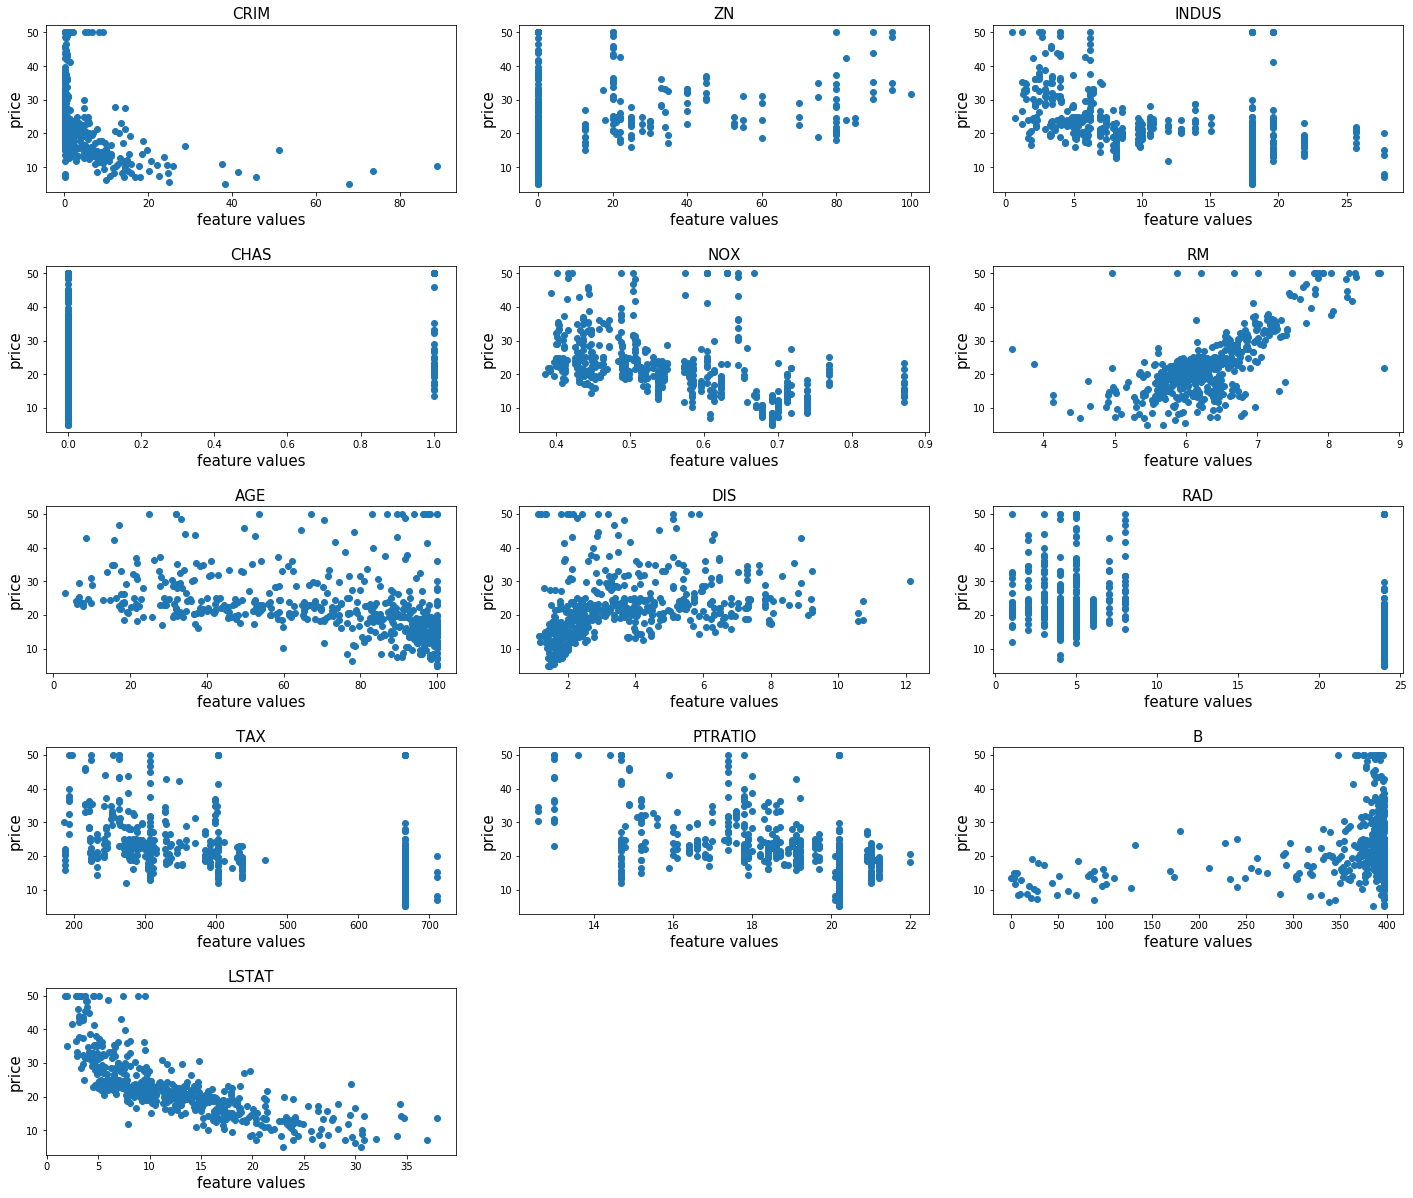

In [0]:
fig = plt.figure(figsize=(20,17))
# plt.subplots_adjust(wspace=0.5, hspace=0.5)
for feature_name,feature_num in zip(columns, range(X.shape[1])):
    plt.subplot(5,3, feature_num+1)
    plt.title(feature_name, fontsize=15)
    plt.xlabel('feature values', fontsize=15)
    plt.ylabel('price', fontsize=15)
    plt.scatter(X[:,feature_num], y)
fig.tight_layout(pad=2.0)
plt.show()

Более продвинутая визуализация - корреляционная матрица:

In [32]:
# !pip install seaborn

In [33]:
import seaborn as sns

In [34]:
dataframe = pd.DataFrame(data=np.hstack((X, y)), columns=columns)

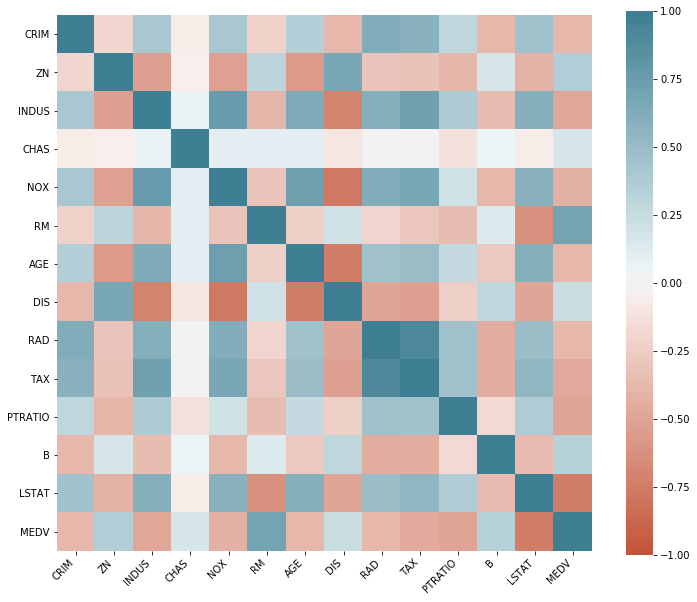

In [37]:
corr = dataframe.corr()

plt.figure(figsize=(12, 10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Какая из переменных -- целевая (target)? С какими признаками она корреляирует?

### Преобработка данных (Data preprocessing)

Под предобработкой понимается:
1. Заполнение пропущенных значений ([SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html))
2. Кодирование категориальных признаков ([LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html))
3. Фильтрация выбросов ([IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html))
4. Масштабирование признаков ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html))

{для KNN важно нормализовывать данные. те к [0;1]}

### Разбиение выборки на Train и Test

In [38]:
from sklearn import model_selection 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

### Обучение моделей и вывод метрик

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

In [57]:
# models initialization
linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

svr = SVR()

ada = AdaBoostRegressor()
rf = RandomForestRegressor()
bagging = BaggingRegressor()
grad = GradientBoostingRegressor()

regressors = [linreg, ridge, lasso, elastic_net, svr, ada, rf, bagging, grad]
regressor_names = [
    "Linear Regression", "Ridge", "Lasso", "Elastic Net", 
    "SVR",
    "Bagging", "Random Forest",  
    "AdaBoost", "Gradient Boost"
]

# model selection
for regressor,regressor_name in zip(regressors, regressor_names):
    # training
    regressor.fit(X_train,y_train.ravel())
    # inference / prediction
    predicted_values = regressor.predict(X_test)
    # metrics
    print("-----------------------------------\n")
    print("For Regressor :", regressor_name)
    print("Mean Absolute Error :", metrics.mean_absolute_error(list(y_test), predicted_values))
    print("Median Absolute Error :", metrics.median_absolute_error(list(y_test), predicted_values))
    print("Mean Squared Error :", metrics.mean_squared_error(list(y_test), predicted_values))
    print("R2 Score :", metrics.r2_score(list(y_test), predicted_values)) # эту метрику надо увеличивать
    print("---------------------------------\n")

-----------------------------------

For Regressor : Linear Regression
Mean Absolute Error : 3.4776145321355516
Median Absolute Error : 2.3298241294187214
Mean Squared Error : 30.145722863256964
R2 Score : 0.6812198752636204
---------------------------------

-----------------------------------

For Regressor : Ridge
Mean Absolute Error : 3.506580883701673
Median Absolute Error : 2.255144528084146
Mean Squared Error : 31.04390215792071
R2 Score : 0.6717219538209229
---------------------------------

-----------------------------------

For Regressor : Lasso
Mean Absolute Error : 3.709275521761266
Median Absolute Error : 2.3383685538792722
Mean Squared Error : 31.485725573186528
R2 Score : 0.6670498308776858
---------------------------------

-----------------------------------

For Regressor : Elastic Net
Mean Absolute Error : 3.6925111491516733
Median Absolute Error : 2.3865564565711104
Mean Squared Error : 31.269468236264167
R2 Score : 0.6693366740611111
-----------------------------

/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


-----------------------------------

For Regressor : Random Forest
Mean Absolute Error : 2.116769736842104
Median Absolute Error : 1.2869999999999955
Mean Squared Error : 9.99876413815789
R2 Score : 0.8942666827519808
---------------------------------

-----------------------------------

For Regressor : AdaBoost
Mean Absolute Error : 2.2784868421052633
Median Absolute Error : 1.5000000000000009
Mean Squared Error : 11.58673618421053
R2 Score : 0.877474452251662
---------------------------------

-----------------------------------

For Regressor : Gradient Boost
Mean Absolute Error : 2.09049022243207
Median Absolute Error : 1.4314467128353225
Mean Squared Error : 7.538693789355148
R2 Score : 0.9202810376310756
---------------------------------



/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* XGBoost
* Light GBM
* CatBoost

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

XGBoost = GradientBoostingClassifier()
lgbm = LGBMClassifier(random_state=5)
catbst = CatBoostClassifier()

models = [XGBoost, lgbm, catbst]
models_name = ['XGBoost', 'lgbm', 'catbst']
#for model, model_name in zip(models ,models_name): 
#model.fit(X_train, y_train)
catbst.fit(X_train, y_train.ravel())
    

0:	learn: 5.2940114	total: 1.48s	remaining: 24m 36s
1:	learn: 5.2842243	total: 1.84s	remaining: 15m 16s
2:	learn: 5.2745975	total: 2.27s	remaining: 12m 34s
3:	learn: 5.2644960	total: 2.68s	remaining: 11m 7s
4:	learn: 5.2535427	total: 3.1s	remaining: 10m 17s
5:	learn: 5.2441783	total: 3.49s	remaining: 9m 38s
6:	learn: 5.2341555	total: 3.88s	remaining: 9m 10s
7:	learn: 5.2244733	total: 4.26s	remaining: 8m 47s
8:	learn: 5.2148292	total: 4.66s	remaining: 8m 32s
9:	learn: 5.2050540	total: 5.05s	remaining: 8m 20s
10:	learn: 5.1952660	total: 5.45s	remaining: 8m 10s
11:	learn: 5.1856949	total: 5.89s	remaining: 8m 4s
12:	learn: 5.1762197	total: 6.32s	remaining: 7m 59s
13:	learn: 5.1670506	total: 6.75s	remaining: 7m 55s
14:	learn: 5.1568421	total: 7.2s	remaining: 7m 52s
15:	learn: 5.1476245	total: 7.58s	remaining: 7m 46s
16:	learn: 5.1380272	total: 8s	remaining: 7m 42s
17:	learn: 5.1283159	total: 8.42s	remaining: 7m 39s
18:	learn: 5.1192960	total: 8.82s	remaining: 7m 35s
19:	learn: 5.1093333	tot

158:	learn: 3.9121991	total: 1m 4s	remaining: 5m 43s
159:	learn: 3.9042755	total: 1m 5s	remaining: 5m 42s
160:	learn: 3.8962398	total: 1m 5s	remaining: 5m 42s
161:	learn: 3.8883084	total: 1m 6s	remaining: 5m 41s
162:	learn: 3.8809361	total: 1m 6s	remaining: 5m 40s
163:	learn: 3.8725592	total: 1m 6s	remaining: 5m 40s
164:	learn: 3.8649517	total: 1m 7s	remaining: 5m 39s
165:	learn: 3.8571110	total: 1m 7s	remaining: 5m 39s
166:	learn: 3.8499336	total: 1m 7s	remaining: 5m 38s
167:	learn: 3.8420204	total: 1m 8s	remaining: 5m 38s
168:	learn: 3.8341937	total: 1m 8s	remaining: 5m 37s
169:	learn: 3.8269171	total: 1m 9s	remaining: 5m 36s
170:	learn: 3.8195137	total: 1m 9s	remaining: 5m 36s
171:	learn: 3.8127244	total: 1m 9s	remaining: 5m 35s
172:	learn: 3.8051276	total: 1m 10s	remaining: 5m 35s
173:	learn: 3.7979463	total: 1m 10s	remaining: 5m 35s
174:	learn: 3.7905346	total: 1m 11s	remaining: 5m 34s
175:	learn: 3.7827747	total: 1m 11s	remaining: 5m 34s
176:	learn: 3.7764668	total: 1m 11s	remain

311:	learn: 2.9121750	total: 2m 5s	remaining: 4m 37s
312:	learn: 2.9056731	total: 2m 6s	remaining: 4m 36s
313:	learn: 2.9004384	total: 2m 6s	remaining: 4m 36s
314:	learn: 2.8964154	total: 2m 7s	remaining: 4m 36s
315:	learn: 2.8918607	total: 2m 7s	remaining: 4m 35s
316:	learn: 2.8862981	total: 2m 7s	remaining: 4m 35s
317:	learn: 2.8825449	total: 2m 8s	remaining: 4m 35s
318:	learn: 2.8770924	total: 2m 8s	remaining: 4m 34s
319:	learn: 2.8713577	total: 2m 9s	remaining: 4m 34s
320:	learn: 2.8664446	total: 2m 9s	remaining: 4m 33s
321:	learn: 2.8599395	total: 2m 9s	remaining: 4m 33s
322:	learn: 2.8537931	total: 2m 10s	remaining: 4m 32s
323:	learn: 2.8480222	total: 2m 10s	remaining: 4m 32s
324:	learn: 2.8433774	total: 2m 10s	remaining: 4m 32s
325:	learn: 2.8369903	total: 2m 11s	remaining: 4m 31s
326:	learn: 2.8321703	total: 2m 11s	remaining: 4m 31s
327:	learn: 2.8275627	total: 2m 12s	remaining: 4m 30s
328:	learn: 2.8228871	total: 2m 12s	remaining: 4m 30s
329:	learn: 2.8179819	total: 2m 12s	rem

465:	learn: 2.2461336	total: 3m 20s	remaining: 3m 49s
466:	learn: 2.2407674	total: 3m 20s	remaining: 3m 49s
467:	learn: 2.2377184	total: 3m 21s	remaining: 3m 48s
468:	learn: 2.2337016	total: 3m 21s	remaining: 3m 48s
469:	learn: 2.2295702	total: 3m 22s	remaining: 3m 48s
470:	learn: 2.2261992	total: 3m 22s	remaining: 3m 47s
471:	learn: 2.2239625	total: 3m 23s	remaining: 3m 47s
472:	learn: 2.2205636	total: 3m 23s	remaining: 3m 46s
473:	learn: 2.2181157	total: 3m 24s	remaining: 3m 46s
474:	learn: 2.2153621	total: 3m 24s	remaining: 3m 46s
475:	learn: 2.2111157	total: 3m 25s	remaining: 3m 45s
476:	learn: 2.2065320	total: 3m 25s	remaining: 3m 45s
477:	learn: 2.2033249	total: 3m 26s	remaining: 3m 45s
478:	learn: 2.1988209	total: 3m 26s	remaining: 3m 44s
479:	learn: 2.1945036	total: 3m 27s	remaining: 3m 44s
480:	learn: 2.1907937	total: 3m 27s	remaining: 3m 43s
481:	learn: 2.1873531	total: 3m 28s	remaining: 3m 43s
482:	learn: 2.1834968	total: 3m 28s	remaining: 3m 43s
483:	learn: 2.1798468	total:

618:	learn: 1.7401195	total: 4m 37s	remaining: 2m 50s
619:	learn: 1.7378576	total: 4m 38s	remaining: 2m 50s
620:	learn: 1.7349940	total: 4m 38s	remaining: 2m 50s
621:	learn: 1.7323755	total: 4m 39s	remaining: 2m 49s
622:	learn: 1.7292692	total: 4m 39s	remaining: 2m 49s
623:	learn: 1.7263567	total: 4m 40s	remaining: 2m 48s
624:	learn: 1.7226645	total: 4m 40s	remaining: 2m 48s
625:	learn: 1.7205597	total: 4m 41s	remaining: 2m 48s
626:	learn: 1.7190021	total: 4m 41s	remaining: 2m 47s
627:	learn: 1.7151447	total: 4m 42s	remaining: 2m 47s
628:	learn: 1.7120021	total: 4m 43s	remaining: 2m 46s
629:	learn: 1.7090280	total: 4m 43s	remaining: 2m 46s
630:	learn: 1.7057152	total: 4m 43s	remaining: 2m 46s
631:	learn: 1.7019265	total: 4m 44s	remaining: 2m 45s
632:	learn: 1.6982311	total: 4m 44s	remaining: 2m 45s
633:	learn: 1.6943225	total: 4m 45s	remaining: 2m 44s
634:	learn: 1.6913401	total: 4m 45s	remaining: 2m 44s
635:	learn: 1.6890757	total: 4m 46s	remaining: 2m 43s
636:	learn: 1.6859163	total:

771:	learn: 1.3548212	total: 5m 54s	remaining: 1m 44s
772:	learn: 1.3520764	total: 5m 55s	remaining: 1m 44s
773:	learn: 1.3498777	total: 5m 55s	remaining: 1m 43s
774:	learn: 1.3488803	total: 5m 56s	remaining: 1m 43s
775:	learn: 1.3467625	total: 5m 56s	remaining: 1m 43s
776:	learn: 1.3443692	total: 5m 57s	remaining: 1m 42s
777:	learn: 1.3417642	total: 5m 57s	remaining: 1m 42s
778:	learn: 1.3392953	total: 5m 58s	remaining: 1m 41s
779:	learn: 1.3375129	total: 5m 58s	remaining: 1m 41s
780:	learn: 1.3362274	total: 5m 59s	remaining: 1m 40s
781:	learn: 1.3338567	total: 5m 59s	remaining: 1m 40s
782:	learn: 1.3313571	total: 6m	remaining: 1m 39s
783:	learn: 1.3296104	total: 6m 1s	remaining: 1m 39s
784:	learn: 1.3282759	total: 6m 1s	remaining: 1m 39s
785:	learn: 1.3266197	total: 6m 2s	remaining: 1m 38s
786:	learn: 1.3242240	total: 6m 2s	remaining: 1m 38s
787:	learn: 1.3220970	total: 6m 3s	remaining: 1m 37s
788:	learn: 1.3193468	total: 6m 3s	remaining: 1m 37s
789:	learn: 1.3176032	total: 6m 4s	rem

926:	learn: 1.0607798	total: 7m 7s	remaining: 33.7s
927:	learn: 1.0599120	total: 7m 8s	remaining: 33.2s
928:	learn: 1.0587927	total: 7m 8s	remaining: 32.8s
929:	learn: 1.0573911	total: 7m 9s	remaining: 32.3s
930:	learn: 1.0553605	total: 7m 9s	remaining: 31.8s
931:	learn: 1.0545397	total: 7m 9s	remaining: 31.4s
932:	learn: 1.0523079	total: 7m 10s	remaining: 30.9s
933:	learn: 1.0501771	total: 7m 10s	remaining: 30.4s
934:	learn: 1.0484619	total: 7m 11s	remaining: 30s
935:	learn: 1.0470828	total: 7m 11s	remaining: 29.5s
936:	learn: 1.0455599	total: 7m 12s	remaining: 29.1s
937:	learn: 1.0440493	total: 7m 12s	remaining: 28.6s
938:	learn: 1.0427952	total: 7m 12s	remaining: 28.1s
939:	learn: 1.0415009	total: 7m 13s	remaining: 27.7s
940:	learn: 1.0397989	total: 7m 13s	remaining: 27.2s
941:	learn: 1.0385184	total: 7m 14s	remaining: 26.7s
942:	learn: 1.0367060	total: 7m 14s	remaining: 26.3s
943:	learn: 1.0352652	total: 7m 14s	remaining: 25.8s
944:	learn: 1.0336139	total: 7m 15s	remaining: 25.3s
9

In [83]:
catbst_predicted_values = catbst.predict(X_test)
# metrics
print("-----------------------------------\n")
print("For Regressor :", "Catboost")
print("Mean Absolute Error :", metrics.mean_absolute_error(list(y_test), catbst_predicted_values))
print("Median Absolute Error :", metrics.median_absolute_error(list(y_test), catbst_predicted_values))
print("Mean Squared Error :", metrics.mean_squared_error(list(y_test), catbst_predicted_values))
print("R2 Score :", metrics.r2_score(list(y_test), catbst_predicted_values)) # эту метрику надо увеличивать
print("---------------------------------\n")

-----------------------------------

For Regressor : Catboost
Mean Absolute Error : 2.844736888534144
Median Absolute Error : 2.100000190734864
Mean Squared Error : 15.311447962711028
R2 Score : 0.8380869712898216
---------------------------------



### Подбор гиперпараметров

Возьмем Gradient Boosting и попробуем подобрать гиперпараметры получше:

In [87]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10]
}

После нахождения самых лучших гиперпараметров можно их поварьировать

In [88]:
for num_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        grad = GradientBoostingRegressor(
            n_estimators=num_estimators, 
            max_depth=max_depth
        )
        # training
        grad.fit(X_train, y_train)
        # inference / prediction
        predicted_values = list(grad.predict(X_test))
        # metrics
        print("-----------------------------------\n")
        print("For params : num_estimators=",num_estimators, "max_depth=", max_depth)
        print("Mean Absolute Error :", metrics.mean_absolute_error(list(y_test), predicted_values))
        print("Median Absolute Error :", metrics.median_absolute_error(list(y_test), predicted_values))
        print("Mean Squared Error :", metrics.mean_squared_error(list(y_test), predicted_values))
        print("R2 Score :", metrics.r2_score(list(y_test), predicted_values)) # эту метрику надо увеличивать
        print("---------------------------------\n")

/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators= 100 max_depth= 3
Mean Absolute Error : 2.103529015542957
Median Absolute Error : 1.465157245116714
Mean Squared Error : 7.681296526923916
R2 Score : 0.9187730652173397
---------------------------------



/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators= 100 max_depth= 5
Mean Absolute Error : 2.2693480776499095
Median Absolute Error : 1.3848274823787117
Mean Squared Error : 14.973353732841632
R2 Score : 0.8416621955848005
---------------------------------



/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators= 100 max_depth= 10
Mean Absolute Error : 2.6923313928337684
Median Absolute Error : 1.778415552430296
Mean Squared Error : 20.399200825389997
R2 Score : 0.7842858234603398
---------------------------------



/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators= 200 max_depth= 3
Mean Absolute Error : 2.061129151963344
Median Absolute Error : 1.5236060877578197
Mean Squared Error : 7.448351009677337
R2 Score : 0.9212363798766525
---------------------------------



/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators= 200 max_depth= 5
Mean Absolute Error : 2.254801897028477
Median Absolute Error : 1.3587076620416543
Mean Squared Error : 13.95691352410291
R2 Score : 0.8524106834548237
---------------------------------



/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators= 200 max_depth= 10
Mean Absolute Error : 2.676095297198111
Median Absolute Error : 1.7444137751707163
Mean Squared Error : 19.638487065648036
R2 Score : 0.792330096550729
---------------------------------



/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators= 300 max_depth= 3
Mean Absolute Error : 2.084031852387508
Median Absolute Error : 1.5582040055014588
Mean Squared Error : 7.643478934234371
R2 Score : 0.9191729725929063
---------------------------------



/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators= 300 max_depth= 5
Mean Absolute Error : 2.243920799162031
Median Absolute Error : 1.465986131130208
Mean Squared Error : 13.179204639015586
R2 Score : 0.8606346738537702
---------------------------------



/home/kulinar/mipt_hackathon/.venv/lib/python3.5/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators= 300 max_depth= 10
Mean Absolute Error : 2.613494545207422
Median Absolute Error : 1.5929740117364473
Mean Squared Error : 17.824384434411773
R2 Score : 0.8115135762666839
---------------------------------



Какое сочетание получилось наилучшим? Как вы думаете, почему?

In [89]:
grad = GradientBoostingRegressor(n_estimators=200, max_depth=3)

### Теперь вам по силам настоящее соревнование!

Поучаствуйте в [реальном соревновании по House Pricing на Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), чтобы отточить навыки и продолжить постигать машинное обучение.

## Полезные ссылки

Deep Learning School при ФПМИ МФТИ:
* [Официальный сайт](https://www.dlschool.org/) | [Github](https://github.com/DLSchool/deep_learning_2018-19) | [YouTube](https://www.youtube.com/channel/UCFTNoZYjkg-3LZTHrHfV1nQ/) | [VK](https://vk.com/dlschool_mipt) | [Telegram]()

Курсы:
* [Специализация Яндекса по Анализу данных и Машинному обучению](https://ru.coursera.org/specializations/machine-learning-data-analysis)
* [Открытый курс по машинному обучению от OpenDataScience](https://habr.com/ru/company/ods/blog/322626/)
* [deeplearning.ai](https://www.coursera.org/specializations/deep-learning) по Deep Learning (нейронные сети)
* [Stanford cs231n](http://cs231n.stanford.edu/) по Computer Vision
* [Stanford cs224n](http://web.stanford.edu/class/cs224n/) по Natural Language Processing

Демо:
* [Сайт-сборник интерактивных демо по машинному обучению](http://arogozhnikov.github.io/2016/04/28/demonstrations-for-ml-courses.html)